# 三维向量

- 三维绘图
- 三维向量

注意, 要让 `matplotlib` 库的 3D 绘图正常工作, 需要在编译 Python 时设置好 `Tcl/Tk` 的环境, 编译的 Python 才能支持 `python3-tk` 执行, 否则会引发类似如下错误:

```python
>>> import tkinter  
Traceback (most recent call last):
  File "<stdin>", line 1, in <module>
  File "/usr/local/lib/python3.8/tkinter/__init__.py", line 36, in <module>
    import _tkinter # If this fails your Python may not be configured for Tk
ModuleNotFoundError: No module named '_tkinter'
>>> 
```

具体的方法为:
1. 安装 `Tcl/Tk` 开发库: 命令行 `sudo apt install tk-dev`
2. 安装对 Python 的支持: 命令行 `sudo apt install python3-tk`
3. 编译 Python, 这里以 `PyEnv` 工具为例: 命令行 `pyenv install 3.10.3`
4. 测试是否可以启用 `tkinter` 包: 命令行 `python -c "import tkinter"`

In [12]:
try:
    import sys
    # 将项目根路径加入系统路径集合, 即可以引入相关的包
    sys.path.append("../..")
finally:
    pass

# 引入所需的包
from common import Vector3D, Number
from common.vector_draw import draw3d, Color, Points3D, Arrow3D, Segment3D, Box3D


## 1. 在三维坐标系绘图


**练习:** 绘制一个空的三维坐标系


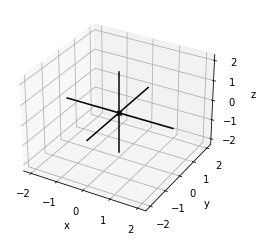

In [13]:
draw3d()


**练习:** 在三维坐标系中绘制点

绘制 `(2, 2, 2)` 和 `(1, -2, -2)` 两个点


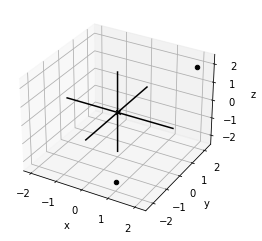

In [14]:
# 两个点的坐标
v1, v2 = (2, 2, 2), (1, -2, -2)

draw3d(
    Points3D(v1, v2),  # 绘制两个点
)


**练习:** 在三维坐标系中绘制点和线段

绘制 `(2, 2, 2)` 和 `(1, -2, -2)` 两个点, 并用线段连接, 最后用箭头从原点指向这两个点


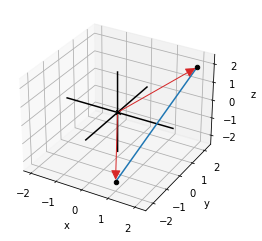

In [15]:
# 两个点的坐标
v1, v2 = (2, 2, 2), (1, -2, -2)

draw3d(
    Points3D(v1, v2),  # 绘制两个点
    Segment3D(v1, v2),  # 绘制连接两个点的线段
    Arrow3D(v1),  # 绘制原点到 v1 点的箭头
    Arrow3D(v2),  # 绘制原点到 v2 点的箭头
)


**练习:** 在三维坐标系中绘制点和线段, 并绘制坐标点和轴组成的立方体

绘制 `(2, 2, 2)` 和 `(1, -2, -2)` 两个点, 并用线段连接, 最后用箭头从原点指向这两个点


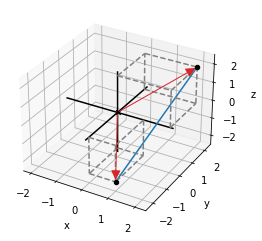

In [16]:
# 两个点的坐标
v1, v2 = (2, 2, 2), (1, -2, -2)

draw3d(
    Points3D(v1, v2),  # 绘制两个点
    Segment3D(v1, v2),  # 绘制连接两个点的线段
    Arrow3D(v1),  # 绘制原点到 v1 点的箭头
    Arrow3D(v2),  # 绘制原点到 v2 点的箭头
    Box3D(*v1),  # 绘制 v1 点和坐标轴组成的立方体
    Box3D(*v2),  # 绘制 v2 点和坐标轴组成的立方体
)


**练习:** 绘制表示坐标 `(-1, -2, 2)` 的点和三维箭头, 以及使箭头更立体的虚线框

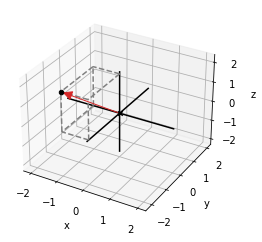

In [17]:
# 要绘制的三维向量
v = (-1, -2, 2)

# 绘制图形
draw3d(
    Points3D(v),  # 绘制点
    Arrow3D(v),  # 绘制原点到坐标点的箭头
    Box3D(*v),  # 绘制坐标点和坐标轴组成的立方体
)


**练习:** 有 `8` 个三维向量的坐标都是 `+1` 或 `-1`. 例如 `(1, -1, 1)` 就是其中之一. 将这 `8` 个向量绘制成点, 然后想办法通过线段将它们连接到一起, 以形成立方体的轮廓

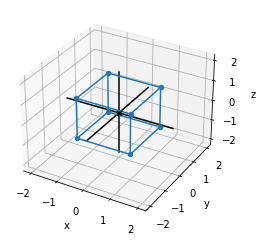

In [18]:
pm1 = [1, -1]

# 穷举 1, -1 两个数, 产生 8 个端点
# [
#   (1, 1, 1),
#   (1, 1, -1),
#   (1, -1, 1),
#   (1, -1, -1),
#   (-1, 1, 1),
#   (-1, 1, -1),
#   (-1, -1, 1),
#   (-1, -1, -1),
# ]
vertices = [(x, y, z) for x in pm1 for y in pm1 for z in pm1]

# 穷举 1, -1 两个数, 产生连接 8 个端点的 12 条线段
# 每组循环产生 4 组线段
# [
#   ((-1, 1, 1), (1, 1, 1)),
#   ((-1, 1, -1), (1, 1, -1)),
#   ((-1, -1, 1), (1, -1, 1)),
#   ((-1, -1, -1), (1, -1, -1)),
#   ((1, -1, 1), (1, 1, 1)),
#   ((1, -1, -1), (1, 1, -1)),
#   ((-1, -1, 1), (-1, 1, 1)),
#   ((-1, -1, -1), (-1, 1, -1)),
#   ((1, 1, -1), (1, 1, 1)),
#   ((1, -1, -1), (1, -1, 1)),
#   ((-1, 1, -1), (-1, 1, 1)),
#   ((-1, -1, -1), (-1, -1, 1)),
# ]
edges = (
    [((-1, y, z), (1, y, z)) for y in pm1 for z in pm1] +
    [((x, -1, z), (x, 1, z)) for x in pm1 for z in pm1] +
    [((x, y, -1), (x, y, 1)) for x in pm1 for y in pm1]
)

# 绘制图形
draw3d(
    Points3D(*vertices, color=Color.blue),  # 绘制 8 个端点
    *[Segment3D(*edge) for edge in edges],  # 绘制 12 条线段
)


## 2. 3D 向量运算

### 2.1. 向量加法

**知识:** 两个 3D 向量相加仍是将向量的各个对应分量进行相加, 例如 `(2, 1, 1)` 和 `(1, 2, 2)` 相加为 `(2+1, 1+2, 1+2) = (3, 3, 3)`

In [19]:
def add3d(v1: Vector3D, v2: Vector3D) -> Vector3D:
    """
    将两个三维向量进行相加

    Args:
        v1 (Vector3D): 相加的两个三维向量之一
        v2 (Vector3D): 相加的两个三维向量之一

    Returns:
        Vector3D: 向量相加之和
    """
    return (v1[0] + v2[0], v1[1] + v2[1], v1[2] + v2[2])


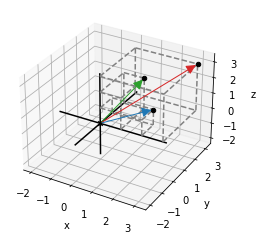

In [20]:
v1, v2 = (2, 1, 1), (1, 2, 2)
vr = add3d(v1, v2)

draw3d(
    Points3D(v1, v2, vr),
    Arrow3D(v1, color=Color.blue),
    Arrow3D(v2, color=Color.green),
    Arrow3D(vr, color=Color.red),
    Box3D(*v1),
    Box3D(*v2),
    Box3D(*vr),
)


三维向量相加, 从图形表示上, 相当于将被加的两个向量首尾相接, 即得到结果向量